In [ ]:
import pandas as pd

order = pd.read_csv("/content/Order_semicolon.csv", sep=";")
campaign_queue = pd.read_csv("/content/CampaignQueue_semicolon.csv", sep=";")
campaign = pd.read_csv("/content/Campaign_semicolon.csv", sep=";")

print("=== Order ===")
print(order.head())
print(order.info())

print("\n=== CampaignQueue ===")
print(campaign_queue.head())
print(campaign_queue.info())

print("\n=== Campaign ===")
print(campaign.head())
print(campaign.info())


=== Order ===
   id   companyId containerId         createdAt  customer displayId engineId  \
0   1  I0VP1DZXGU    AKVXT2FH  08/01/2025 15:47       525    O8CC98   E3R037   
1   2  04MEUULZ6W    KKMY5TG5  03/11/2024 22:30       694    HJ99VA   EJVOBV   
2   3  W2ZZS7CCZW    I87JLGTV  09/09/2024 05:49       491    XJJDH2   UDX1ZF   
3   4  SQ5MBL8L24    W3ZXOQHO  22/05/2025 06:22       846    J8QDM3   30FLOC   
4   5  0RCNJ6BRJD    NA0C0FOS  22/02/2025 01:23        77    H4LV73   QI3URN   

    engineName engineType                                     extraInfo  ...  \
0  DirectOrder        POS  Adipisci maiores nam eius vero nesciunt sed.  ...   
1  DirectOrder        APP                                           NaN  ...   
2       KDSPro        POS                                           NaN  ...   
3       KDSPro        WEB                Autem mollitia voluptas quasi.  ...   
4       KDSPro        POS                                           NaN  ...   

   orderTiming  orderTyp

          tabela  linhas  colunas  \
0          Order    2000       23   
1  CampaignQueue    5000       16   
2       Campaign    2000       14   

                                     colunas_exemplo  
0  id, companyId, containerId, createdAt, custome...  
1  id, jobId, campaignId, storeId, storeInstanceI...  
2  id, segmentId, templateId, storeId, name, desc...  


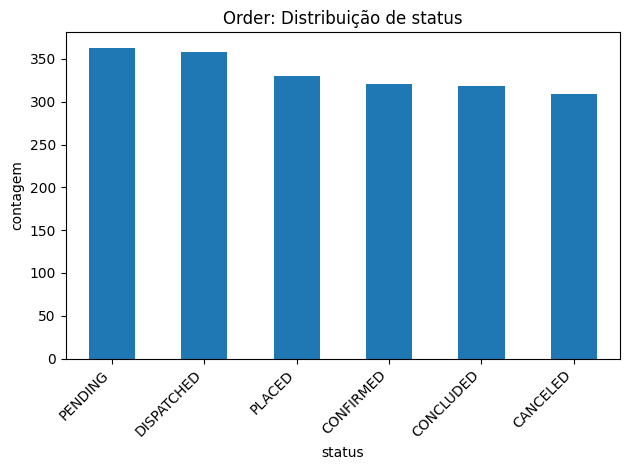

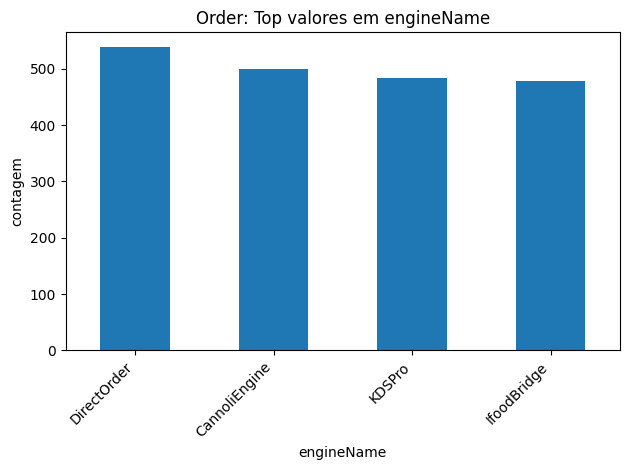

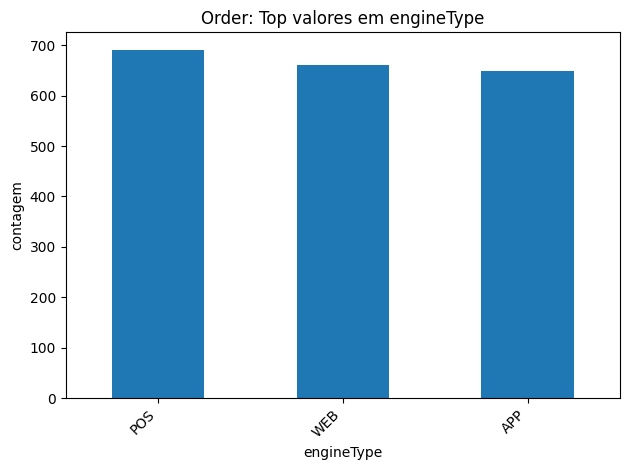

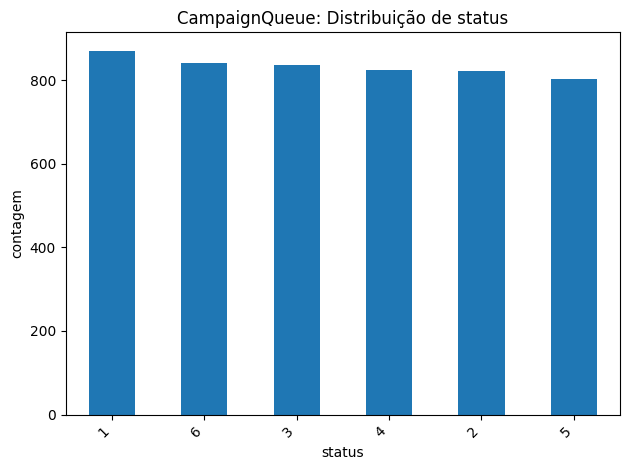

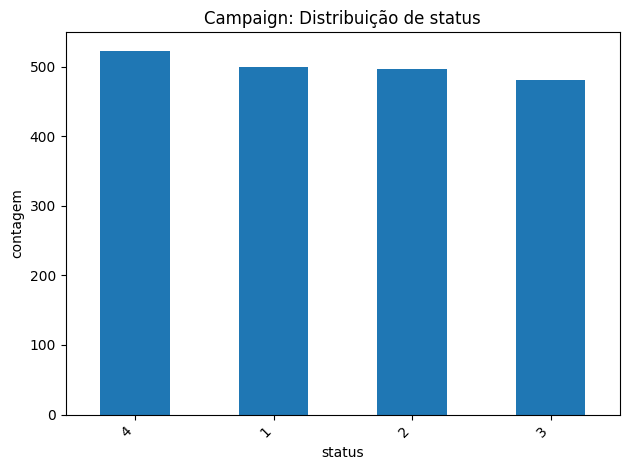

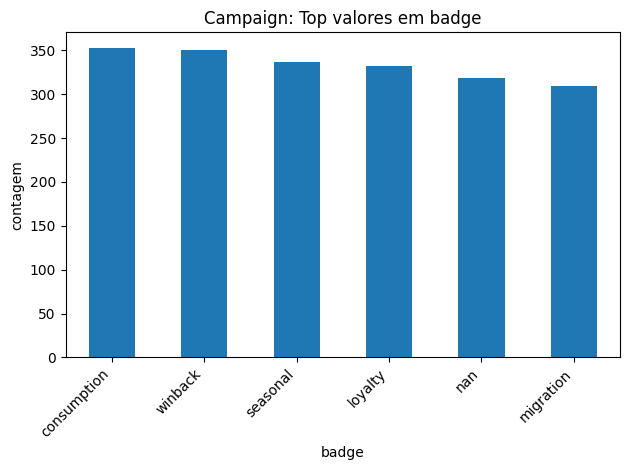

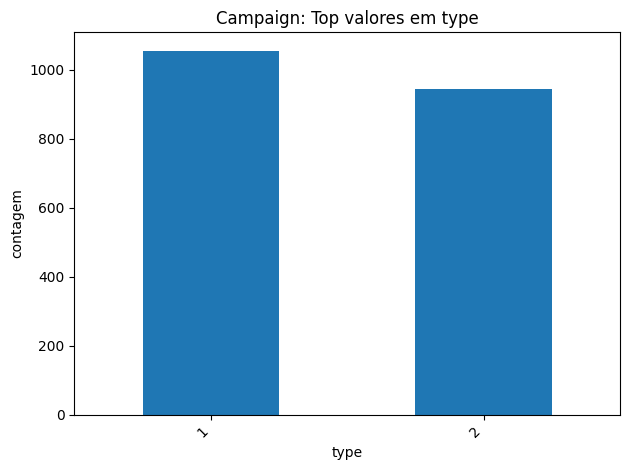

/tmp/ipython-input-277061759.py:26: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  s = pd.to_datetime(df[c], errors='coerce', dayfirst=True, infer_datetime_format=True)
/tmp/ipython-input-277061759.py:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  s = pd.to_datetime(df[c], errors='coerce', dayfirst=True, infer_datetime_format=True)
/tmp/ipython-input-277061759.py:26: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  s = 

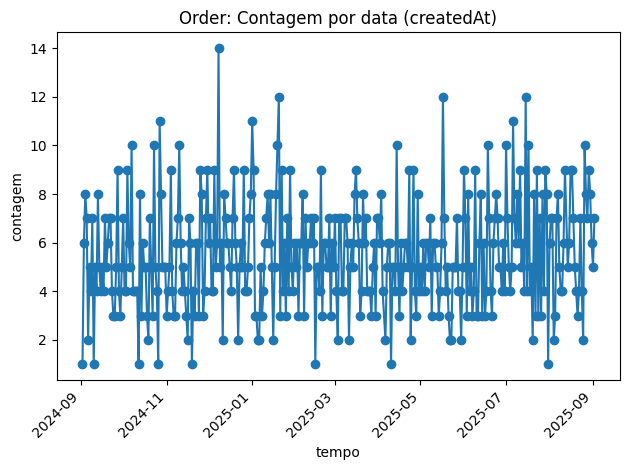

Order - mais colunas de data: ['createdAt', 'updatedAt']


/tmp/ipython-input-277061759.py:26: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  s = pd.to_datetime(df[c], errors='coerce', dayfirst=True, infer_datetime_format=True)
/tmp/ipython-input-277061759.py:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  s = pd.to_datetime(df[c], errors='coerce', dayfirst=True, infer_datetime_format=True)
/tmp/ipython-input-277061759.py:26: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  s = 

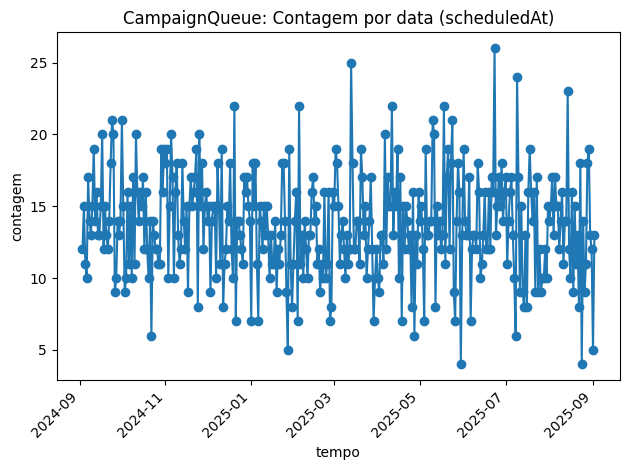

CampaignQueue - mais colunas de data: ['scheduledAt', 'sendAt', 'createdAt', 'updatedAt']


/tmp/ipython-input-277061759.py:26: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  s = pd.to_datetime(df[c], errors='coerce', dayfirst=True, infer_datetime_format=True)
/tmp/ipython-input-277061759.py:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  s = pd.to_datetime(df[c], errors='coerce', dayfirst=True, infer_datetime_format=True)
/tmp/ipython-input-277061759.py:26: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  s = 

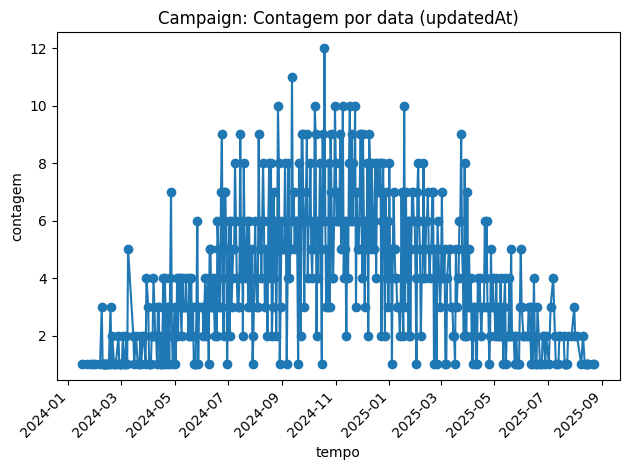

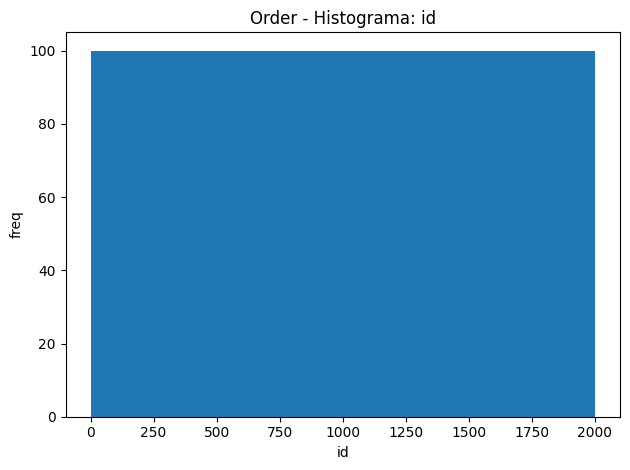

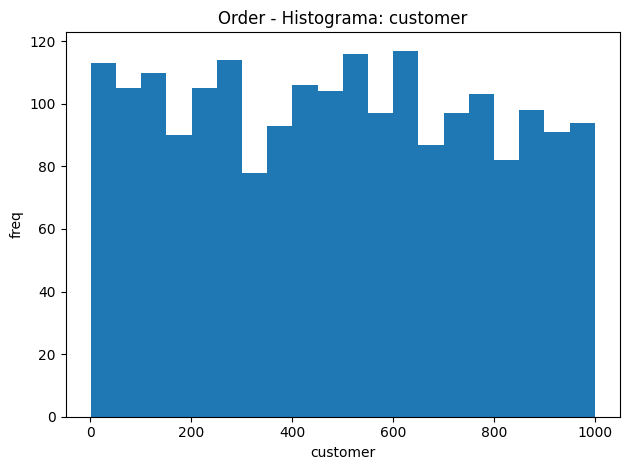

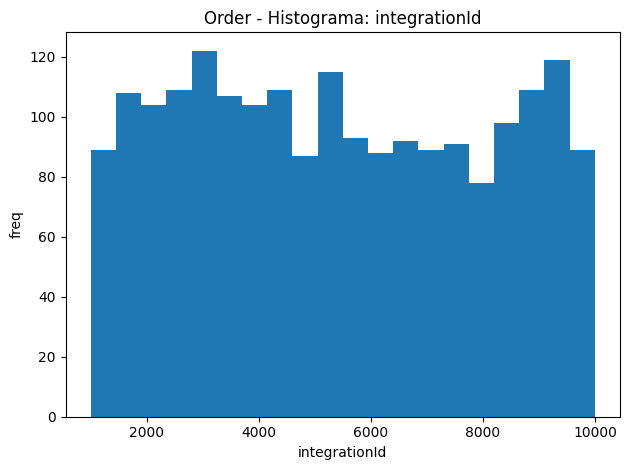

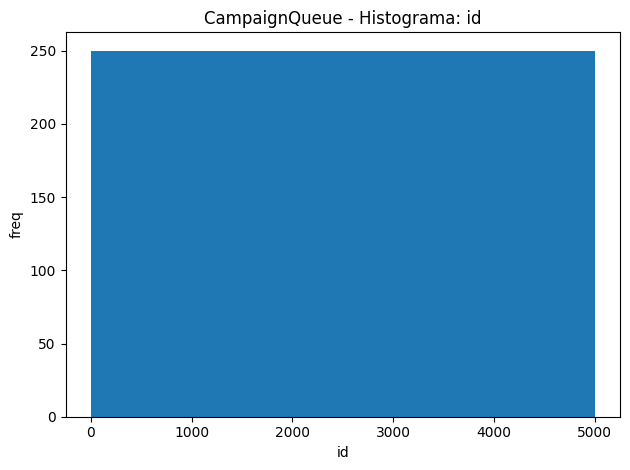

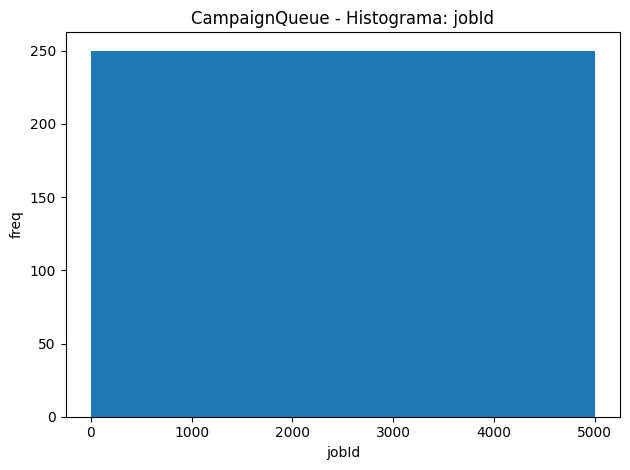

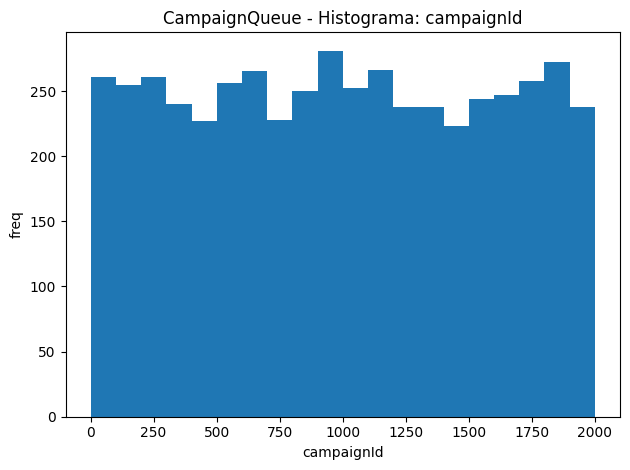

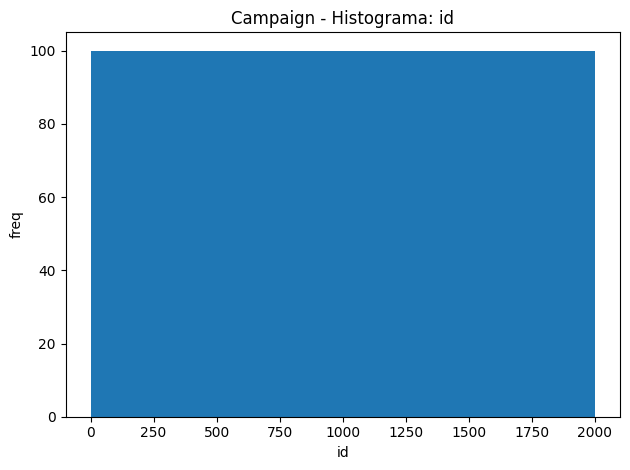

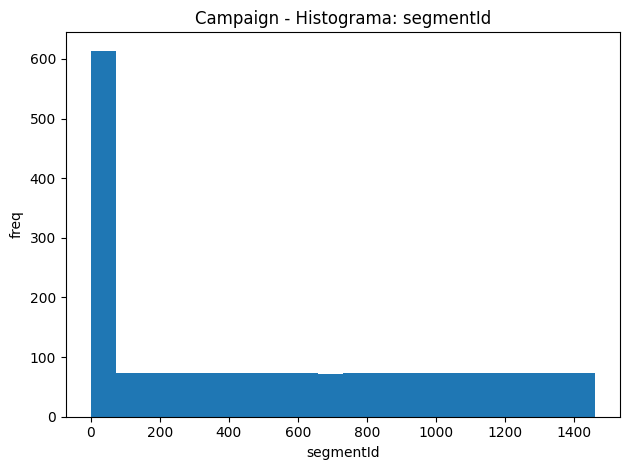

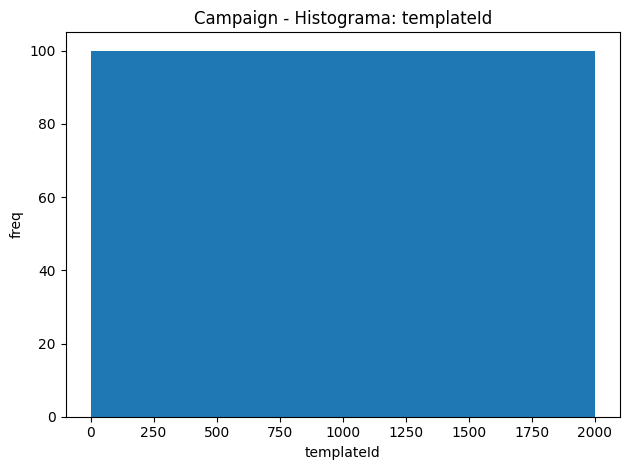

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

paths = {
    "Order": "/content/Order_semicolon.csv",
    "CampaignQueue": "/content/CampaignQueue_semicolon.csv",
    "Campaign": "/content/Campaign_semicolon.csv",
}

dfs = {name: pd.read_csv(path, sep=";", dtype=str) for name, path in paths.items()}

def detect_numeric_cols(df, thr=0.8):
    cols=[]
    for c in df.columns:
        try:
            s = pd.to_numeric(df[c].str.replace(',', '.', regex=False), errors='coerce')
            if s.notna().mean()>=thr: cols.append(c)
        except: pass
    return cols

def detect_datetime_cols(df, thr=0.6):
    cols=[]
    for c in df.columns:
        try:
            s = pd.to_datetime(df[c], errors='coerce', dayfirst=True, infer_datetime_format=True)
            if s.notna().mean()>=thr: cols.append(c)
        except: pass
    return cols

def top_counts_plot(s, title, topn=10):
    vc = s.astype(str).str.strip().replace({"": np.nan}).dropna().value_counts().head(topn)
    if vc.empty: return
    plt.figure(); vc.plot(kind="bar"); plt.title(title); plt.xlabel(s.name or "categoria"); plt.ylabel("contagem")
    plt.xticks(rotation=45, ha="right"); plt.tight_layout(); plt.show()

def time_series_count_plot(s, title, freq="D"):
    dt = pd.to_datetime(s, errors='coerce', dayfirst=True, infer_datetime_format=True).dropna()
    if dt.empty: return
    counts = dt.dt.to_period(freq).value_counts().sort_index()
    x = counts.index.to_timestamp(); y = counts.values
    plt.figure(); plt.plot(x, y, marker="o"); plt.title(title); plt.xlabel("tempo"); plt.ylabel("contagem")
    plt.xticks(rotation=45, ha="right"); plt.tight_layout(); plt.show()

def numeric_hist_plot(df, cols, title_prefix):
    for c in cols[:3]:  # limita a 3
        try:
            s = pd.to_numeric(df[c].str.replace(',', '.', regex=False), errors='coerce').dropna()
            if s.empty: continue
            plt.figure(); plt.hist(s, bins=20); plt.title(f"{title_prefix}: {c}")
            plt.xlabel(c); plt.ylabel("freq"); plt.tight_layout(); plt.show()
        except: pass

snap = pd.DataFrame([{
    "tabela": name, "linhas": df.shape[0], "colunas": df.shape[1],
    "colunas_exemplo": ", ".join(df.columns[:8]) if not df.empty else "-"
} for name, df in dfs.items()])
print(snap)

for name, df in dfs.items():
    if df.empty: continue
    if "CampaignID" in df.columns:
        top_counts_plot(df["CampaignID"], f"{name}: Top 10 CampaignID")
    for cand in ["Status","status"]:
        if cand in df.columns:
            top_counts_plot(df[cand], f"{name}: Distribuição de {cand}"); break
    cat_cols = []
    for c in df.columns:
        if df[c].dtype=='object':
            uniq = df[c].nunique(dropna=True)
            if 2<=uniq<=20 and c not in ["CampaignID","Status","status"]:
                cat_cols.append(c)
    for c in cat_cols[:2]:
        top_counts_plot(df[c], f"{name}: Top valores em {c}")

for name, df in dfs.items():
    if df.empty: continue
    dt_cols = detect_datetime_cols(df)
    if dt_cols:
        time_series_count_plot(df[dt_cols[0]], f"{name}: Contagem por data ({dt_cols[0]})")
        if len(dt_cols)>1:
            print(f"{name} - mais colunas de data:", dt_cols)

#histogramas
for name, df in dfs.items():
    if df.empty: continue
    num_cols = detect_numeric_cols(df)
    if num_cols:
        numeric_hist_plot(df, num_cols, f"{name} - Histograma")
    else:
        print(f"{name}: nenhuma coluna numérica detectada (>=80% valores numéricos).")

#campaignID em Order
if (not dfs["Order"].empty and "CampaignID" in dfs["Order"].columns):
    vc = dfs["Order"]["CampaignID"].astype(str).str.strip().replace({"": np.nan}).dropna().value_counts().head(10)
    if not vc.empty:
        plt.figure(); vc.plot(kind="bar"); plt.title("Order: Top 10 CampaignID por volume")
        plt.xlabel("CampaignID"); plt.ylabel("contagem"); plt.xticks(rotation=45, ha="right"); plt.tight_layout(); plt.show()


In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

BASE = "/content"

files = {
    "Order": f"{BASE}/Order_semicolon.csv",
    "CampaignQueue": f"{BASE}/CampaignQueue_semicolon.csv",
    "Campaign": f"{BASE}/Campaign_semicolon.csv",
}

dfs = {name: pd.read_csv(path, sep=";", dtype=str) for name, path in files.items()}

for name, df in dfs.items():
    df.columns = [c.strip() for c in df.columns]
    dfs[name] = df

def detect_numeric_cols(df, thr=0.8):
    cols = []
    for c in df.columns:
        s = pd.to_numeric(df[c].str.replace(',', '.', regex=False), errors='coerce')
        if s.notna().mean() >= thr:
            cols.append(c)
    return cols

def date_cols_by_name(df):
    candidates = {"createdAt","updatedAt","scheduledAt","sendAt"}
    return [c for c in df.columns if c in candidates]

def parse_dt(series):
    return pd.to_datetime(series, errors='coerce', utc=False)

def dq_basic(df, name):
    print(f"\n================= {name} =================")
    if df.empty:
        print("⚠️ Tabela vazia"); return

    print("Linhas x Colunas:", df.shape)
    print("Colunas:", list(df.columns))

    nulls = df.isna().sum()
    empties = df.apply(lambda c: (c == '').sum() if c.dtype == 'object' else 0)
    miss = (nulls + empties).sort_values(ascending=False)
    worst = miss[miss > 0]
    print("\nNulos por coluna (inclui '' vazios):")
    print(worst.head(30) if not worst.empty else "Sem nulos/vazios")

    print("\nLinhas duplicadas:", int(df.duplicated().sum()))
    const_cols = [c for c in df.columns if df[c].nunique(dropna=False) <= 1]
    print("Colunas constantes:", const_cols if const_cols else "-")

#possíveis chaves únicas
    id_like = [c for c in df.columns if c.lower().endswith("id")]
    unique_ids = [c for c in id_like if df[c].nunique(dropna=True) == len(df)]
    print("Possíveis chaves únicas:", unique_ids if unique_ids else "-")

#numéricos
    num_cols = detect_numeric_cols(df)
    if num_cols:
        num_df = df[num_cols].apply(lambda col: pd.to_numeric(col.str.replace(',', '.', regex=False), errors='coerce'))
        desc = num_df.describe().loc[["min","mean","max"]]
        print("\nNuméricos detectados:", num_cols)
        print(desc)
    else:
        print("\nNuméricos detectados: -")

#datas
    dt_cols = date_cols_by_name(df)
    if dt_cols:
        print("\nDatas detectadas:", dt_cols)
        for c in dt_cols:
            s = parse_dt(df[c])
            print(f"  - {c}: parseável {s.notna().mean():.0%} | min={s.min()} | max={s.max()}")
    else:
        print("\nDatas detectadas: -")

#3tabelas
for name, df in dfs.items():
    dq_basic(df, name)

def fk_check(child_df, parent_df, child_name, parent_name, child_key, parent_key):
    print(f"\n---- FK {child_name}.{child_key} → {parent_name}.{parent_key} ----")
    if child_key not in child_df.columns or parent_key not in parent_df.columns:
        print("Coluna de chave não encontrada em uma das tabelas."); return
    child_vals = child_df[child_key].dropna().astype(str).str.strip().unique()
    parent_set = set(parent_df[parent_key].dropna().astype(str).str.strip().unique())
    if len(child_vals) == 0:
        print("Sem valores na chave na tabela filha."); return
    present = sum(v in parent_set for v in child_vals)
    print(f"Valores distintos na filha: {len(child_vals)}")
    print(f"Presentes no pai: {present} ({present/len(child_vals):.0%})")
    print(f"Faltantes no pai: {len(child_vals) - present}")

if not dfs["Campaign"].empty and not dfs["CampaignQueue"].empty:
    fk_check(dfs["CampaignQueue"], dfs["Campaign"], "CampaignQueue", "Campaign", "campaignId", "id")


================= Order =================
Linhas x Colunas: (2000, 23)
Colunas: ['id', 'companyId', 'containerId', 'createdAt', 'customer', 'displayId', 'engineId', 'engineName', 'engineType', 'extraInfo', 'integrated', 'integrationId', 'isTest', 'orderTiming', 'orderType', 'salesChannel', 'scheduledAt', 'status', 'preparationTime', 'takeOutTimeInSeconds', 'totalAmount', 'updatedAt', 'version']

Nulos por coluna (inclui '' vazios):
extraInfo      1181
scheduledAt     968
dtype: int64

Linhas duplicadas: 0
Colunas constantes: -
Possíveis chaves únicas: ['id', 'companyId', 'containerId', 'displayId', 'engineId']

Numéricos detectados: ['id', 'customer', 'integrationId', 'preparationTime', 'takeOutTimeInSeconds', 'totalAmount']
          id   customer  integrationId  preparationTime  takeOutTimeInSeconds  \
min      1.0     1.0000       1007.000           5.0000               60.0000   
mean  1000.5   489.7675       5416.938          47.3275             1842.5345   
max   2000.0  1000.00